In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [14]:
df = pd.read_csv(r"data\BankChurners_preprocessed.csv")


In [15]:
# Define the feature matrix X and the target vector y
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [17]:
# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9590325765054294
Confusion Matrix:
 [[ 265   62]
 [  21 1678]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



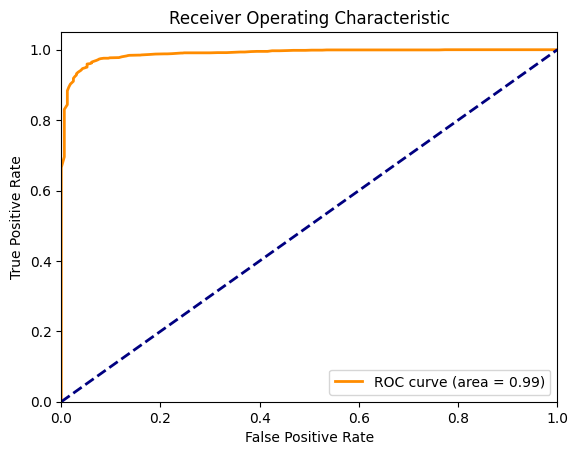

In [18]:
# Predict probabilities for the test set
y_probs = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9570582428430404
Confusion Matrix:
 [[ 288   39]
 [  48 1651]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       327
           1       0.98      0.97      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [22]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")


Feature ranking:
1. feature 15 (0.2147328441225936) - Total_Trans_Ct
2. feature 14 (0.20784965075259634) - Total_Trans_Amt
3. feature 11 (0.09426562598651204) - Total_Revolving_Bal
4. feature 16 (0.09174890689115904) - Total_Ct_Chng_Q4_Q1
5. feature 17 (0.060872474502983616) - Avg_Utilization_Ratio
6. feature 7 (0.060364525173135515) - Total_Relationship_Count
7. feature 13 (0.05471457573486418) - Total_Amt_Chng_Q4_Q1
8. feature 10 (0.028017482811970043) - Credit_Limit
9. feature 12 (0.02765922451850876) - Avg_Open_To_Buy
10. feature 0 (0.024137065077839498) - Customer_Age
11. feature 18 (0.023732117120581864) - Marital_Status_Married
12. feature 1 (0.022419364787074993) - Gender
13. feature 6 (0.016979123001954418) - Months_on_book
14. feature 8 (0.015885254105029258) - Months_Inactive_12_mon
15. feature 9 (0.013113476970089072) - Contacts_Count_12_mon
16. feature 19 (0.010358911009367927) - Marital_Status_Single
17. feature 4 (0.009508580456248897) - Income_Category
18. feature 2 (0.